## MiniProyecto 6

#### Juan Lorthiois

#### Elder Guzman

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from statistics import mode

### Ejercicio 1:

Estimacion de la probabilidad de obtener cara o escudo en una moneda balanceadad via el método de MonteCarlo

In [2]:

def simular_moneda(n_iters):
    
    No_caras = 0   #Inicializar contadores
    
    No_escudos = 0
    
    for i in range(0, n_iters):       
        
        resultado = np.random.randint(0,2)   #Lanzamos la moneda 1 vez. La muestra proveiene de una distribucion uniforme.
        
        if resultado == 0:    #Si es cara le agregamos 1 al contador de caras
            No_caras += 1
        else:
            No_escudos += 1   #Si no es cara (o sea es escudo) le sumamos 1 al contador de escudos
            
    Prob_cara = No_caras/n_iters  #Calculamos la probabilidad de obtener cara basado en los resultados de la anterior simulacion
    
    Prob_escudos = No_escudos/n_iters  #Calulamos la probabilidad de obtener escudos
    
    return Prob_cara, Prob_escudos   #Devolver reultados de la simulacion para n iteraciones




Ahora que ya se preparó la simulación, determinamos la probabilidad de obtener cara y escudo respectivamente, después de 1,000,000 iteraciones.

In [16]:
simular_moneda(1000000)  #Funciona !

(0.500729, 0.499271)

Como podemos ver, ambas probabilidades son muy cercanas a 0.5, lo cual es consistente con la teoría.

Ahora, procedemos a generar un gráfica que nos indique la probabilidad calculada de obtener cara o escudo, en cada iteracion.

Text(0, 0.5, 'Probabilidad')

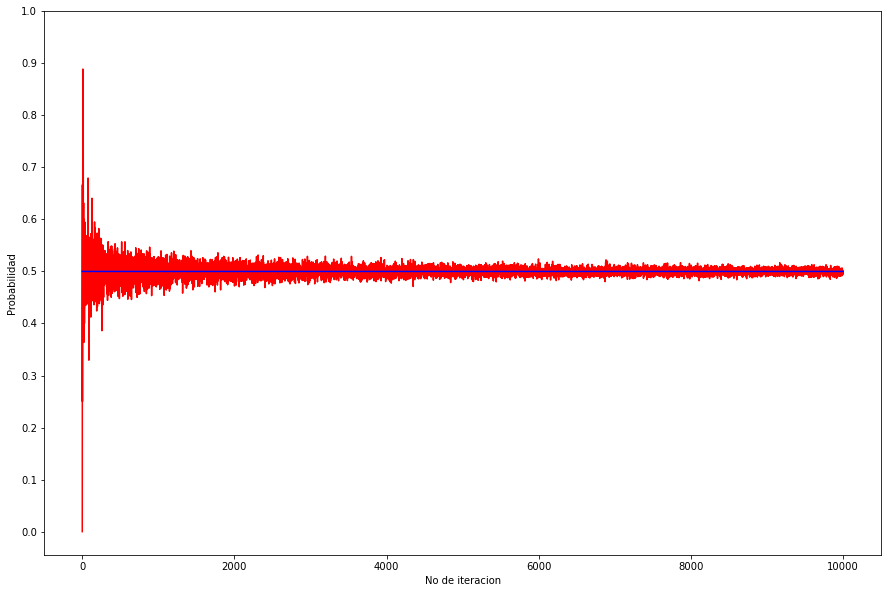

In [40]:
X = [i for i in range(1, 10001)]

Y = [simular_moneda(i)[0] for i in X]

C = [0.5 for i in range(1, 10001)]


plt.figure(figsize =(15, 10))
plt.plot(X,Y, '-r')
plt.plot(X, C, '-b')
plt.yticks( np.arange(0, 1.1, 0.1))
plt.xlabel('No de iteracion')
plt.ylabel('Probabilidad')

### Ejercicio 2

In [65]:
def seleccion():
    
    n = random.randint(1,2)

    if n == 0:
        
        return True
    
    else:
        
        return False

In [66]:
def Monte_Carlo(dinero, apuesta, juegos):

    dinero_juegos = [dinero]

    par = seleccion()

    for i in range(juegos):

        if dinero < apuesta:

            faltan = juegos - len(dinero_juegos)
            for j in range(faltan): dinero_juegos.append(dinero)
            return dinero_juegos, dinero

        n = random.randint(1,101)

        if par:

            if n%2 == 0 and n != 10: dinero = dinero + apuesta

            else: dinero = dinero - apuesta
      
        else:

            if n%2 == 1 and n != 11: dinero = dinero + apuesta

            else: dinero = dinero - apuesta

        dinero_juegos.append(dinero)

    return dinero_juegos, dinero

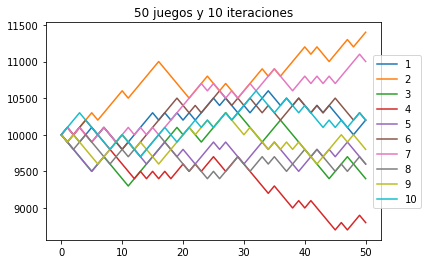

In [67]:
J50S10 = []
xAxis = []

for i in range(51):
    xAxis.append(i)

dinero = 10000
apuesta = 100
juegos = 50

for i in range(10):
  
    a,b = Monte_Carlo(dinero, apuesta, juegos)

    J50S10.append(a)


fig, ax = plt.subplots()

for i in range(10):
    ax.plot(xAxis, J50S10[i])

ax.set_title('50 juegos y 10 iteraciones')

fig.legend([i for i in range(1,11)], loc = 'right')

plt.savefig('50 juegos y 10 iteraciones')

plt.show()

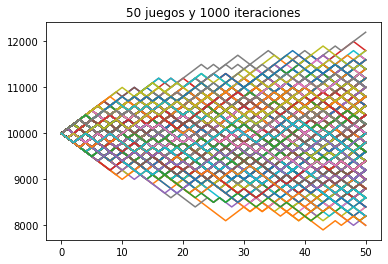

In [68]:
J50S1000 = []
xAxis = []

for i in range(51):
    xAxis.append(i)


dinero = 10000
apuesta = 100
juegos = 50


for i in range(1000):
  
    a,b = Monte_Carlo(dinero, apuesta, juegos)

    J50S1000.append(a)


fig, ax = plt.subplots()

for i in range(1000):
    ax.plot(xAxis, J50S1000[i])

ax.set_title('50 juegos y 1000 iteraciones')

plt.savefig('50 juegos y 1000 iteraciones')

plt.show()

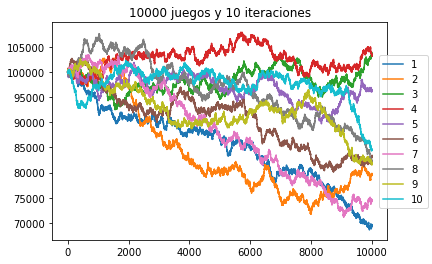

In [69]:
J10000S10 = []
xAxis = []

for i in range(10001):
    xAxis.append(i)

dinero = 100000
apuesta = 100
juegos = 10000

for i in range(10):
  
    a,b = Monte_Carlo(dinero, apuesta, juegos)

    J10000S10.append(a)


fig, ax = plt.subplots()

for i in range(10):
    ax.plot(xAxis, J10000S10[i])

ax.set_title('10000 juegos y 10 iteraciones')

fig.legend([i for i in range(1,11)], loc = 'right')

plt.savefig('10000 juegos y 10 iteraciones')

plt.show()

### Ejercicio 3:

Resolver el problema del TSP mediante MCMC.



En la celda a continucion, ingresamos cada una de las aristas del grafo en forma de un terna (lista) ordenada, donde el primer numero es el nodo de salida, el segundo elemento el nodo de llegada, y el ultimo elemento la distancia que los separa.

Por ejemplo, la arista entre $H_1$ y $H_8$, se denota: $[1,8,8]$

NOTA: Como el grafo es en realidad un multigrafo, ya que hay 2 camino (aristas) entre los nodos $H_1$, y $H_8$, fue necesario crear un noveno nodo "ficticio" denotado por 81. Este nodo se refiere tambien al nodo $H_8$ pero debe notarse que si este aparece en la ruta optima encontrada, por ejemplo $[..., 81, 1]$ entonces, significa que debe emplearse la arista (ruta) directa entre $H_1$, y $H_8$. 

In [3]:


Distancias = [   
    
    [1,2,5], [1,4,6], [1,8,8], [1,6,4], [1,81, 7],
    [2,1,5], [2,5,3], [2,4,4], [2,3,2],
    [3,2,2], [3,4,1],
    [4,3,1], [4,2,4], [4,1,6], [4,5,7], 
    [5,4,7], [5,2,3], [5,7,6], [5,8,4], [5,81, 4],
    [6,1,4], [6,7,3],
    [7,6,3], [7,5,6], [7,8,2], [7,81, 2],
    [8,5,4], [8,1,8], [8,7,2], [8,1,7],
    [81,5,4], [81,1,8], [81,7,2], [81,1,7]
   
]   

La funcion que se describe en la celda a continuacion, permite calcular la distancia recorrida sobre un camino dado, ingresado en formato de lista: por ejemplo $[1,2,4,1,8,1]$

In [482]:
def calc_dist(lista): # Definimos una funcion que dado un camino, i.e. una lista de nodos, nos permita calcular la distancia recorrida
    
    distancia = 0
    
    for i in range(1,len(lista)):
        
        arista = [lista[i], lista[i-1]]
        
        dist_arista = 0
        
        for tupla in Distancias:
            
            if (arista[0] == tupla[0] and arista[1] == tupla[1]):
                
                dist_arista =  tupla[2]
                
        if dist_arista == 0 :    #Si este camino no existe, agregamos un peso excesivo para que el camino no sea tomado en cuenta
            
            distancia = distancia + 100
            
        else:
            distancia = distancia + dist_arista
            
    
    return distancia
                
                
    

In [483]:
calc_dist([1,2,3,4,5, 8,1]) #Funciona!

27

Finalmente, esta funcion se encarga exclusivamente de generar permutaciones aleatorias que empiezan en el nodo 1 y terminan en el nodo 1.

In [559]:
def generador_de_caminos():  #Definimos una funcion que devuelva caminos nuevos a cada vez que se le llama.
    
    lista_1 = [2,3,4,5,6,7,8]
    lista_2 = [2,3,4,5,6,7,81]
    
    sel_lista = np.random.randint(2)
    
    if sel_lista == 0:
        
        camino = random.sample(lista_1, 7)
        camino.insert(0, 1)
        camino.insert(9, 1)
        
        return camino
    
    else:
        camino = random.sample(lista_2, 7)
        camino.insert(0, 1)
        camino.insert(9, 1)
        
        return camino

Finalmente, implementamos la funcion que permite encontrar el camino más corto. Dado que hay mas de 362,000 permutacion posibles, recomendamos correr la funcion sobre al menos 500,000 iteraciones para estar seguros de que la mayoría de los posibles caso fueron cnosiderados. 

Nota: Aunque en este caso se realizaron 1,000,000 silaciones, el proceso en la computadora no tomó más de unos segundos.

In [560]:
def MCMC_mejor_camino(X_o, iters):
    
    Nodos = [2,3,4,5,6,7,8,81]
    
    for i in range(0, iters):
        
        X = generador_de_caminos()
        
        if (calc_dist(X) < calc_dist(X_o)):
            
            X_o = X
            
    return X_o, calc_dist(X_o)

In [561]:
MCMC_mejor_camino([1,2,3,4,5, 6, 7, 8,1], 1000000)  #El resultado!

([1, 4, 3, 2, 5, 81, 7, 6, 1], 25)